# AI Project for SWE 485

# Introducation
 Every human being needs clean water for intake. The World Health Organization (WHO) estimates that 80% of illnesses are water-borne. Industrialization, discharge of internal waste, radioactive waste, population growth, unnecessary use of pesticides, fertilizers and leakage from water tanks are key sources of water effluence. In Addition, there are negative health effects associated with these wastes. Different chemicals have dissimilar affects depending on their positions and categories. Bacterial, viral and parasitic diseases like typhoid, cholera, encephalitis, poliomyelitis, hepatitis, skin infection and gastrointestinal disease are spreading through polluted water [1]. 

Therefore, it is recommended to examine the water quality on a regular basis to avoid its destructive effects on human health. As a matter of fact, the availability of safe drinking water is one of the most vital components of effective health protection policy and constitutes a fundamental human right. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions [2]. 

Our aim to predict the quality of water from 3272 different water bodies where we have the pH value ,Hardness , Solids , Chloramines , Sulfate , Conductivity , Organic carbon , Trihalomethanes , Turbidity all in different values then we have the probability to indicate whether the water is safe or not and to understand the relationship between these different values and the quality of water. 

[1]mportance of safe drinking water for human life - researchgate (no date). Available at: https://www.researchgate.net/publication/341539508_Importance_of_Safe_Drinking_Water_for_Human_Life (Accessed: April 23, 2023).
 
[2]Kadiwal, A. (2021) Water quality, Kaggle. Available at: https://www.kaggle.com/datasets/adityakadiwal/water-potability (Accessed: April 23, 2023). 

In [2]:
#Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean 
from pandas.core.arrays.categorical import contains
import statistics
import seaborn as sns

# Data 
Our dataset is called Water quality, we take it from Kaggle website. The dataset provide information about factors that affect the quality of water if it is safe for human. The link (https://www.kaggle.com/datasets/adityakadiwal/water-potability) show the source data. It consist of 3276 row and each of which have 10 attributes.

Column description and type:

1. ph: pH of 1. water (0 to 14). Type : Numeric
2. Hardness: Capacity of water to precipitate soap in mg/L. Type : Numeric
3. Solids: Total dissolved solids in ppm. Type : Numeric
4. Chloramines: Amount of Chloramines in ppm. Type : Numeric
5. Sulfate: Amount of Sulfates dissolved in mg/L. Type : Numeric
6. Conductivity: Electrical conductivity of water in μS/cm. Type : Numeric
7. Organic_carbon: Amount of organic carbon in ppm. Type : Numeric
8. Trihalomethanes: Amount of Trihalomethanes in μg/L. Type : Numeric
9. Turbidity: Measure of light emiting property of water in NTU. Type : Numeric
10. Potability: Indicates if water is safe for human consumption. Potable 1 and Not potable 0. Type : Numeric



In [3]:
iris =pd.read_csv('water_potability.csv')

In [20]:
# samples of raw dataset
iris.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
#missing data
iris.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Note: Change presentation of figures to Image

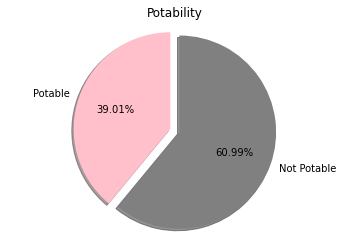

In [22]:
labels= ['Potable', 'Not Potable']
colors=['pink', 'gray']

Potable=iris['Potability']
NumOfPotable=0
NumOfNotPotable=0


for x in Potable:
    if x==1:
        NumOfPotable+=1

    else:
        NumOfNotPotable+=1

sizes= [NumOfPotable, NumOfNotPotable]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0 ), autopct='%1.2f%%')
plt.title('Potability')
plt.axis('equal')
plt.show()

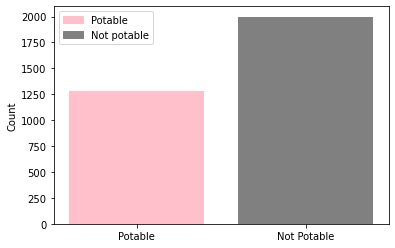

In [23]:

chart = {'Potable' : NumOfPotable, 'Not Potable' : NumOfNotPotable}
label = list(chart.keys())
value = list(chart.values())
colors = {'Potable':'pink', 'Not potable':'gray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Count')
plt.bar(label, value,color=['pink', 'gray'])
plt.show()

The mean of ph is  7.080794504276835
The variance of ph is  2.5418547277358927


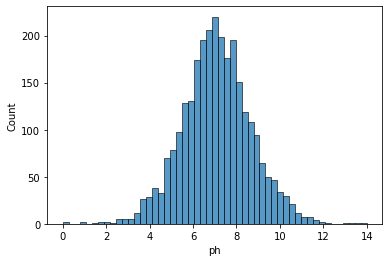

In [24]:
sns.histplot(x='ph',data=iris)

list = iris['ph'].copy().values
list = list[~np.isnan(list)]

print("The mean of ph is " , mean(list))
print("The variance of ph is " , statistics.variance(list))

plt.show()

The mean of Hardness is  196.36949601730154
The variance of Hardness is  1081.0787147379974


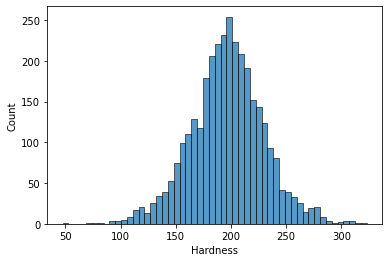

In [25]:
sns.histplot(x='Hardness',data=iris)

list = iris['Hardness'].copy().values
list = list[~np.isnan(list)]

print("The mean of Hardness is " , mean(list))
print("The variance of Hardness is " , statistics.variance(list))

plt.show()

The mean of Solids is  22014.092526077104
The variance of Solids is  76887834.36189838


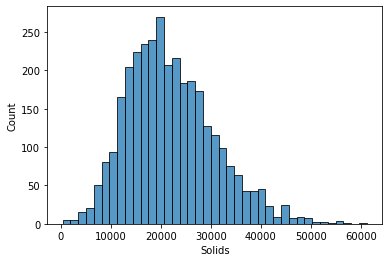

In [26]:
sns.histplot(x='Solids',data=iris)

list = iris['Solids'].copy().values
list = list[~np.isnan(list)]

print("The mean of Solids is " , mean(list))
print("The variance of Solids is " , statistics.variance(list))

plt.show()

The mean of Chloramines is  7.122276793425787
The variance of Chloramines is  2.50615776590587


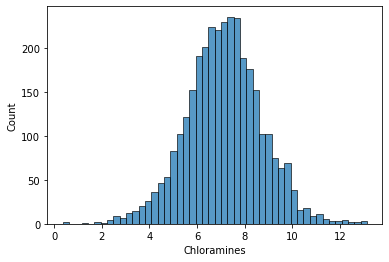

In [27]:
sns.histplot(x='Chloramines',data=iris)

list = iris['Chloramines'].copy().values
list = list[~np.isnan(list)]

print("The mean of Chloramines is " , mean(list))
print("The variance of Chloramines is " , statistics.variance(list))

plt.show()

The mean of Sulfate is  333.77577661081347
The variance of Sulfate is  1715.3546738276493


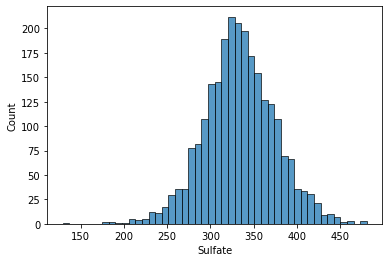

In [28]:
sns.histplot(x='Sulfate',data=iris)

list = iris['Sulfate'].copy().values
list = list[~np.isnan(list)]

print("The mean of Sulfate is " , mean(list))
print("The variance of Sulfate is " , statistics.variance(list))

plt.show()

The mean of Conductivity is  426.20511068255325
The variance of Conductivity is  6532.529329738223


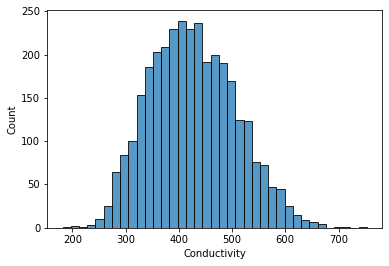

In [29]:
sns.histplot(x='Conductivity',data=iris)

list = iris['Conductivity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Conductivity is " , mean(list))
print("The variance of Conductivity is " , statistics.variance(list))

plt.show()

The mean of Organic_carbon is  14.284970247677318
The variance of Organic_carbon is  10.943935812467114


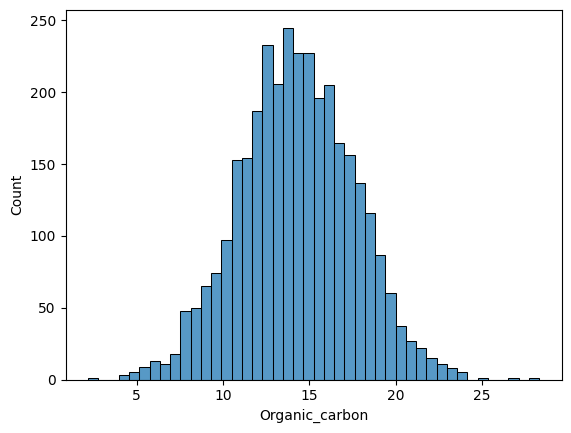

In [13]:
sns.histplot(x='Organic_carbon',data=iris)

list = iris['Organic_carbon'].copy().values
list = list[~np.isnan(list)]

print("The mean of Organic_carbon is " , mean(list))
print("The variance of Organic_carbon is " , statistics.variance(list))

plt.show()

The mean of Trihalomethanes is  66.39629294676803
The variance of Trihalomethanes is  261.6308974588445


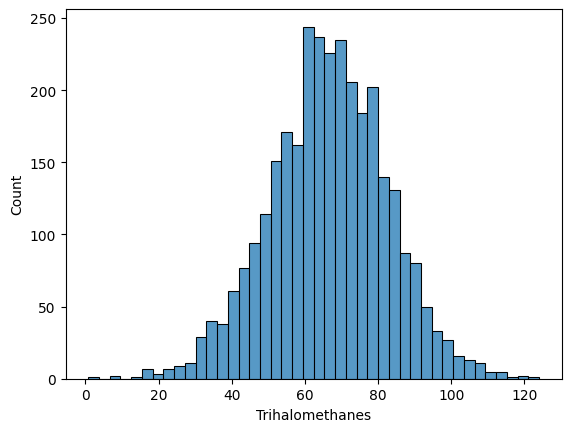

In [14]:
sns.histplot(x='Trihalomethanes',data=iris)

list = iris['Trihalomethanes'].copy().values
list = list[~np.isnan(list)]

print("The mean of Trihalomethanes is " , mean(list))
print("The variance of Trihalomethanes is " , statistics.variance(list))

plt.show()

The mean of Turbidity is  3.9667861697910585
The variance of Turbidity is  0.608996703473493


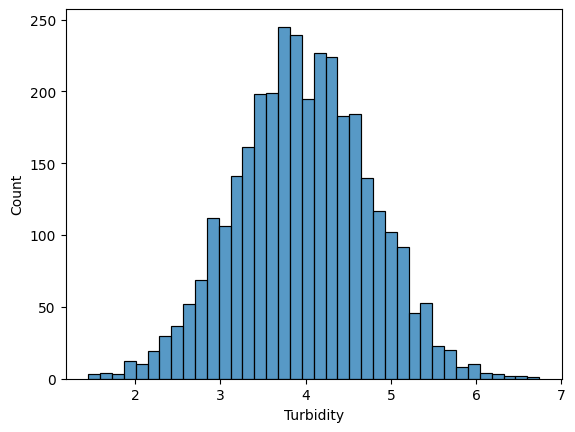

In [15]:
sns.histplot(x='Turbidity',data=iris)


list = iris['Turbidity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Turbidity is " , mean(list))
print("The variance of Turbidity is " , statistics.variance(list))

plt.show()

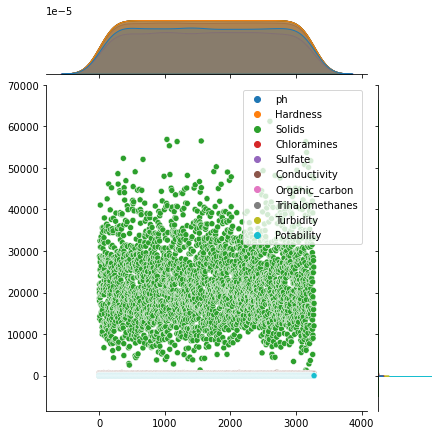

In [16]:
sns.jointplot(data=iris , dropna=True)
plt.show()
